# Importing modules

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading and Preprocessing Data

In [13]:
#Load and preprocess the data
data = pd.read_csv(r"C:\Users\91767\Downloads\archive (2)\Unemployment in India.csv").dropna()
data['Date'] = pd.to_datetime(data['Date'], dayfirst=True)
data['year'] = data['Date'].dt.year
data['month'] = data['Date'].dt.strftime('%B')

In [14]:
def plot_bar(data, column, title):
    x = data.groupby(["Region"])[column].agg(['mean', 'std']).sort_values(by='mean', ascending=False)
    plt.figure(figsize=(12, 10))
    sns.barplot(x='mean', y=x.index, data=x, ci='std', palette='Reds')
    plt.axvline(x['mean'].mean(), color='black', linestyle='dashed', linewidth=1, label='Average')
    plt.legend()
    plt.title(title, fontweight="black", fontsize=20, pad=10)
    plt.xlabel(column)
    plt.ylabel("Region")
    plt.show()

# Data Visualization through Barplot

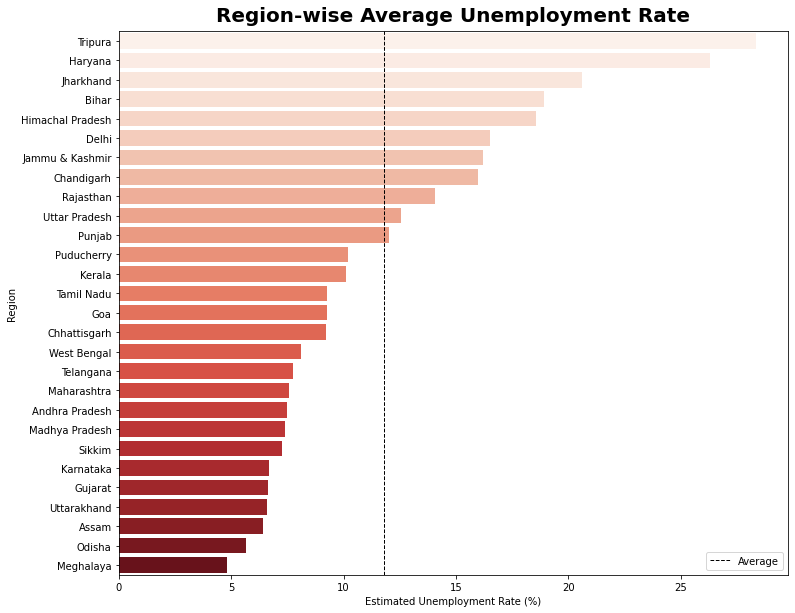

In [15]:
# Plot unemployment rate
plot_bar(data, 'Estimated Unemployment Rate (%)', "Region-wise Average Unemployment Rate")

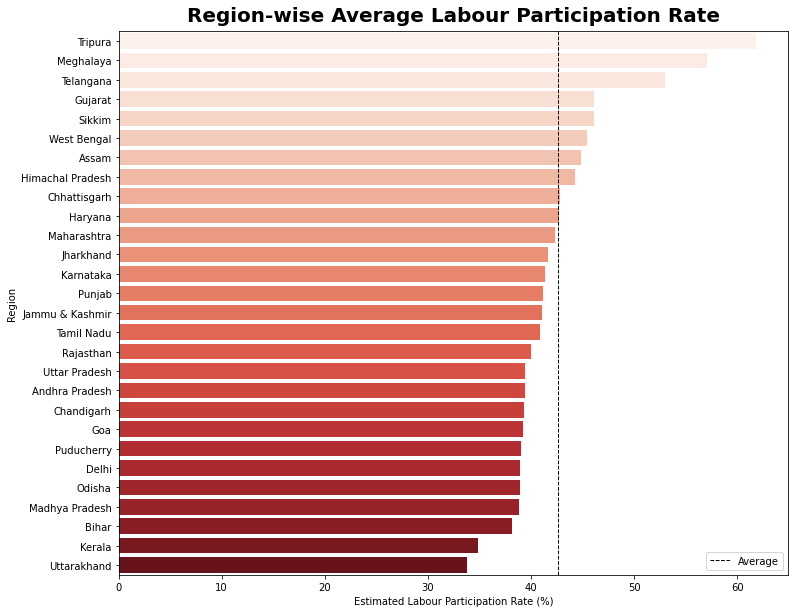

In [16]:
# Plot labor participation rate
plot_bar(data, "Estimated Labour Participation Rate (%)", "Region-wise Average Labour Participation Rate")


In [17]:
# Filter data for the COVID-19 period
covid_data = data[(data["year"] == 2020) & (data["Date"].dt.month >= 3)]


In [18]:
def plot_covid_impact(data, column, title):
    z = data.groupby(["Region"])[column].mean().sort_values(ascending=False).to_frame()
    cmap = plt.cm.get_cmap('Reds', len(z))
    color_palette = [cmap(i) for i in range(len(z))]
    plt.figure(figsize=(10, 10))
    sns.barplot(x=column, y=z.index, data=z, palette=color_palette)
    plt.title(title, fontweight="bold", fontsize=20, pad=20)
    plt.xlabel(column)
    plt.ylabel("States/UT")
    plt.tight_layout()
    plt.show()

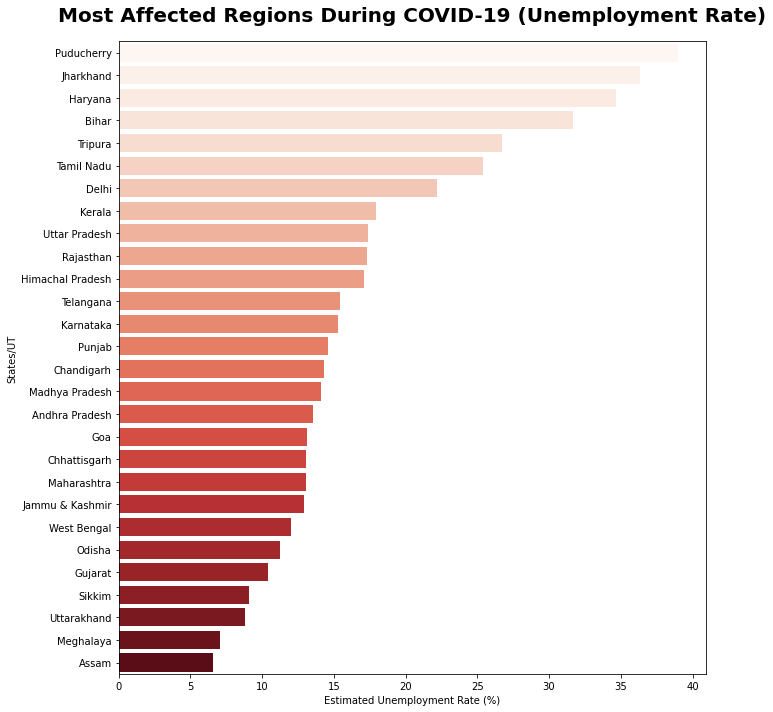

In [19]:
# Plot COVID-19 impact on unemployment rate
plot_covid_impact(covid_data, "Estimated Unemployment Rate (%)", "Most Affected Regions During COVID-19 (Unemployment Rate)")


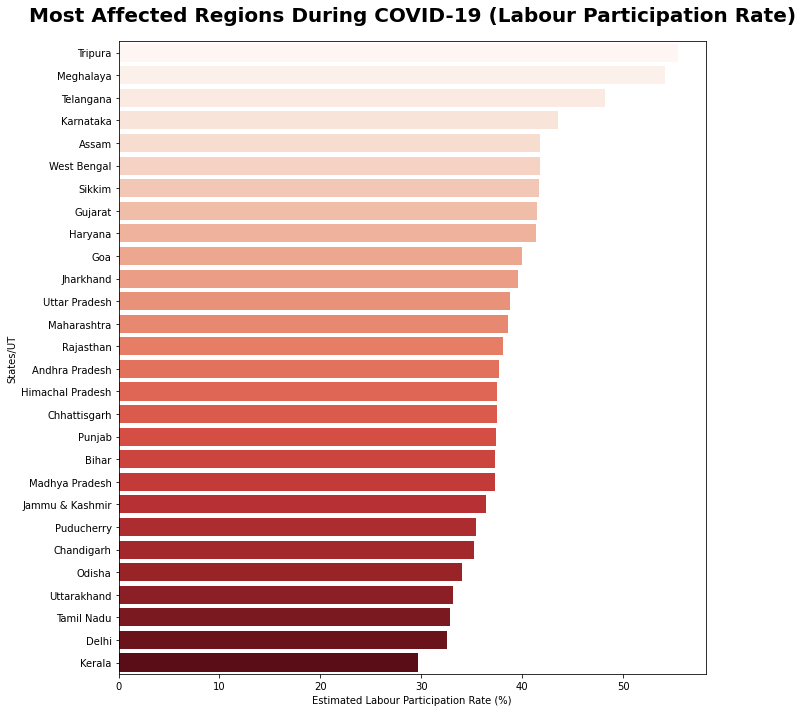

In [20]:
# Plot COVID-19 impact on labor participation rate
plot_covid_impact(covid_data, "Estimated Labour Participation Rate (%)", "Most Affected Regions During COVID-19 (Labour Participation Rate)")